In [ ]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.0 MB/s eta 0:00:00


In [1]:
#importing libraries
from fastai import *
#from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

In [2]:
x  = '/content/AdjustedImages'
path = Path(x)
path.ls()

(#5) [Path('/content/AdjustedImages/Standing'),Path('/content/AdjustedImages/Sitting'),Path('/content/AdjustedImages/SittingPelvicR'),Path('/content/AdjustedImages/StandingPelvicR'),Path('/content/AdjustedImages/.ipynb_checkpoints')]

In [3]:
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                    item_tfms=Resize(460),
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

In [4]:
np.random.seed(40)
# Determine the aspect ratio of your images (720x480)
aspect_ratio = 720 / 480

# Choose a target width or height that maintains the aspect ratio
target_width = 224
target_height = int(target_width / aspect_ratio)  # Calculate height based on aspect ratio
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=aug_transforms(), size=(480, 240),
                                  num_workers=4)#.normalize(imagenet_stats)

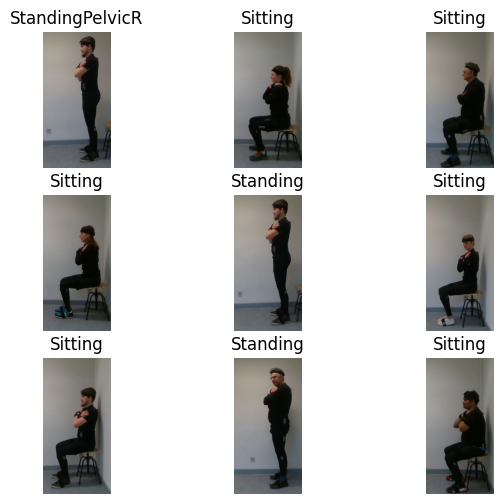

In [5]:
data.show_batch(figsize=(7,6))

In [ ]:
data

In [ ]:
print(data.classes)
len(data.classes)
data.c

AttributeError: classes

In [6]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.9MB/s]


SuggestedLRs(valley=0.0005754399462603033)

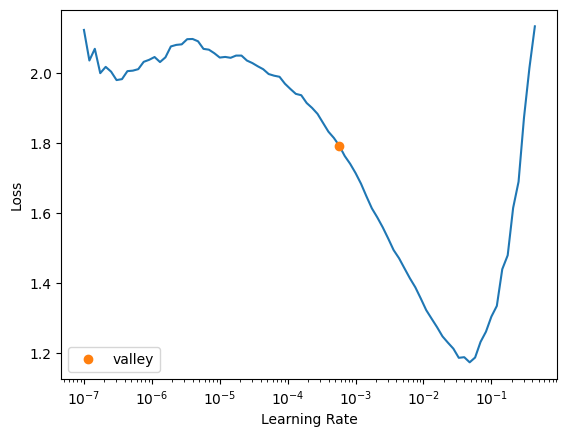

In [7]:
learn.lr_find()
#learn.recorder.plot(suggestions=True)

In [8]:
learn.recorder.plot(suggestions=True)

AttributeError: 'Sequential' object has no attribute 'plot'

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.992365,1.100254,0.683582,00:09
1,0.601021,0.234741,0.913433,00:10
2,0.428469,0.105762,0.964179,00:09
3,0.336297,0.408973,0.919403,00:10
4,0.363010,2.304075,0.794030,00:09
5,0.498960,1.143607,0.856716,00:09
6,0.548572,1.171900,0.826866,00:09
7,0.724277,5.631956,0.728358,00:10
8,0.726076,4.012011,0.770149,00:10
9,0.742404,0.801898,0.907463,00:09


In [10]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.112051,0.089897,0.997015,00:12
1,0.099702,0.924471,0.949254,00:11
2,0.382998,5.466192,0.889552,00:11
3,0.537573,4.234062,0.811940,00:11
4,0.547239,1.072197,0.949254,00:12
5,0.436356,2.249454,0.919403,00:11
6,0.378775,0.651752,0.970149,00:11
7,0.310543,0.217911,0.988060,00:11
8,0.273113,0.390839,0.976119,00:11
9,0.203144,0.196774,0.994030,00:11


In [11]:
learn.recorder.plot_losses()

AttributeError: 'Sequential' object has no attribute 'plot_losses'

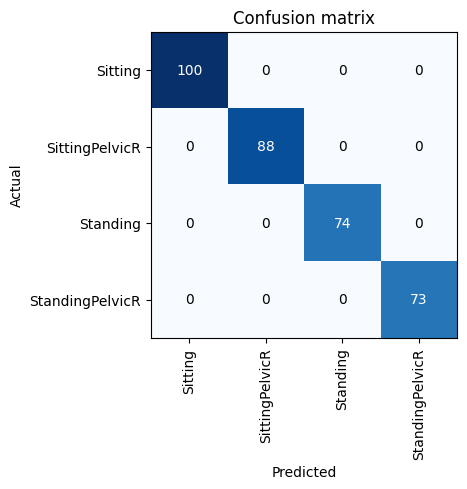

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
#from fastai.vision import open_image
from fastai.vision.all import *
from fastai.vision import models


In [18]:
#img = open_image('/content/testImages/Sitting08004.png')
img = PILImage.create('/content/testImages/Sitting08004.png')
print(learn.predict(img)[0])

Sitting
